In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
class HelperFunctions:
    @staticmethod
    def covariance_matrix2x2d(sigma1, sigma2, sigma12):
        return np.array([[sigma1**2, sigma12], [sigma12, sigma2**2]])
    
    @staticmethod
    def column_matrix(*args):
        return np.expand_dims(np.array(args), axis=0).T

# Problem 1
Multivariant Gaussian Distribution is give as follows:
$${\displaystyle f_{\mathbf {X} }(x_{1},\ldots ,x_{k})={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}$$

In [3]:
def MultivariateGaussianDistribution(mu, sigma, sample_cnt):
    return np.random.multivariate_normal(mu, sigma, sample_cnt)

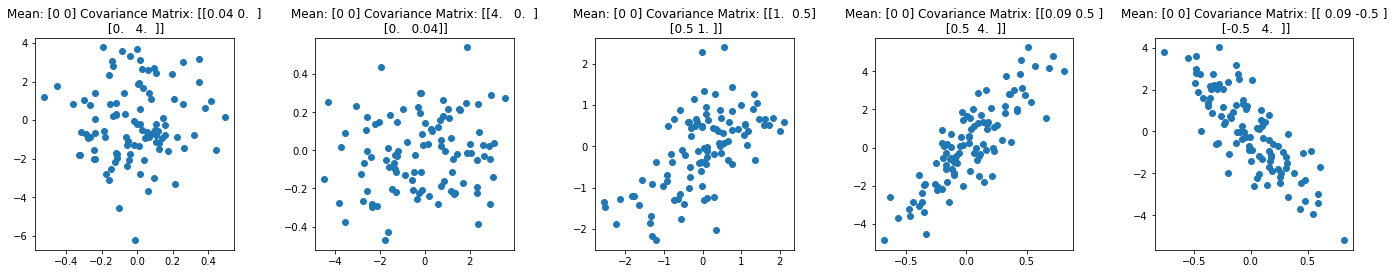

In [4]:
mu = np.array([0, 0])
covariance_mats = [HelperFunctions.covariance_matrix2x2d(0.2, 2, 0),
            HelperFunctions.covariance_matrix2x2d(2, 0.2, 0),
            HelperFunctions.covariance_matrix2x2d(1, 1, 0.5),
            HelperFunctions.covariance_matrix2x2d(0.3, 2, 0.5),
            HelperFunctions.covariance_matrix2x2d(0.3, 2, -0.5)]

fig = plt.figure(figsize=(20, 5))
for idx, covariance_mat in enumerate(covariance_mats):
    ax = fig.add_subplot(1, 5, idx+1)
    ax.set_title(f'Mean: {mu} Covariance Matrix: {covariance_mat}')
    data_pts = MultivariateGaussianDistribution(mu, covariance_mat, 100)
    plt.scatter(data_pts[:,0], data_pts[:, 1])
fig.tight_layout(pad=5)

# Problem 2

In [5]:
class Problem2:
    n1 = 250
    n2 = 500
    m1 = np.array([0, 0, 0, 0, 0])
    m2 = np.array([0, 0, 0, 0, 0])
    s1 = np.array([ \
        [0.8, 0.2, 0.1, 0.05, 0.01],
        [0.2, 0.7, 0.1, 0.03, 0.02],
        [0.1, 0.1, 0.8, 0.02, 0.01],
        [0.05, 0.03, 0.02, 0.9, 0.01],
        [0.01, 0.02, 0.01, 0.01, 0.8] \
    ])
    s2 = np.array([ \
        [0.9, 0.1, 0.05, 0.02, 0.01],
        [0.1, 0.8, 0.1, 0.02, 0.02],
        [0.05, 0.1, 0.7, 0.02, 0.01],
        [0.02, 0.02, 0.02, 0.6, 0.02],
        [0.01, 0.02, 0.01, 0.02, 0.7] \
    ])

In [6]:
x1 = np.random.multivariate_normal(Problem2.m1, Problem2.s1, Problem2.n1)
x2 = np.random.multivariate_normal(Problem2.m2, Problem2.s2, Problem2.n1)
print(x1.shape, x2.shape)

(250, 5) (250, 5)


In [7]:
class BayesClassifier:
    def __init__(self, data, probs):
        self.data = data
        self.probs = probs
        self.mean = list()
        self.vars = list()
        for class_data in self.data:
            self.mean.append(np.mean(class_data, axis=0))
            self.vars.append(np.var(class_data, axis=0))
        self.n_classes = len(self.mean)
    
    def predict(self, data_pts):
        preds = list()
        for data_pt in data_pts:
            probs = list()
            for c in range(self.n_classes):
                prob = 1
                for f in range(data_pt.shape[0]):
                    prob *= 1/(2*np.pi*(self.vars[c][f]**2))
                    prob *= np.exp(-1*((data_pt[f]-self.mean[c][f])**2)/(2*self.vars[c][f]**2))
                prob *= self.probs[c]
                probs.append(prob)
            preds.append(np.argmax(probs))
        return np.expand_dims(np.array(preds), axis=1)

    def accuracy(self, data_pts, data_label):
        n = data_pts.shape[0]
        preds = self.predict(data_pts)
        return (preds==data_label).sum() / n

In [8]:
bc = BayesClassifier([x1, x2], [0.5, 0.5])

In [9]:
bc.predict(x1).shape

(250, 1)

In [10]:
# building testset
test_data = np.vstack(
    (
        np.random.multivariate_normal(Problem2.m1, Problem2.s1, Problem2.n2),
        np.random.multivariate_normal(Problem2.m2, Problem2.s2, Problem2.n2)
    )
)

test_label = np.vstack(
    (
        np.zeros((500, 1)),
        np.ones((500, 1))
    )
)

print(test_data.shape)
print(test_label.shape)

(1000, 5)
(1000, 1)


In [11]:
accuracy = bc.accuracy(test_data, test_label)
print(f'Accuracy: {accuracy} Misclassification rate: {1-accuracy}')

Accuracy: 0.56 Misclassification rate: 0.43999999999999995


# Problem 3

In [12]:
class Problem3:
    p1 = 0.6
    p2 = 0.4
    m1 = np.array([0, 0])
    m2 = np.array([1, 2])
    s = np.array(
        [
            [0.8, 0.2],
            [0.2, 0.8]
        ]
    )
    n1 = 500
    n2 = 1500

In [13]:
train_data = list()
train_data.append(np.random.multivariate_normal(Problem3.m1, Problem3.s, Problem3.n1))
train_data.append(np.random.multivariate_normal(Problem3.m2, Problem3.s, Problem3.n1))

test_data = np.vstack(
    (
        np.random.multivariate_normal(Problem3.m1, Problem3.s, Problem3.n2),
        np.random.multivariate_normal(Problem3.m2, Problem3.s, Problem3.n2)
    )
)
test_label = np.vstack(
    (
        np.zeros((Problem3.n2, 1)),
        np.ones((Problem3.n2, 1))
    )
)

In [14]:
bc = BayesClassifier(train_data, [Problem3.p1, Problem3.p2])
accuracy = bc.accuracy(test_data, test_label)
print(f'Accuracy: {accuracy} Misclassification rate: {1-accuracy}')

Accuracy: 0.8676666666666667 Misclassification rate: 0.1323333333333333


# Problem 4

In [15]:
class Config:
    iris_datapath = Path('../data/iris.data')

In [16]:
iris_dataframe = pd.read_csv(Config.iris_datapath, 
                             names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [17]:
class_encode = {
    'Iris-virginica': 0,
    'Iris-setosa': 1,
    'Iris-versicolor': 2
}

In [18]:
iris_dataframe['class'] = [class_encode[i] for i in iris_dataframe['class']]

In [19]:
train_data, test_data = train_test_split(iris_dataframe, test_size=0.5, shuffle=True, stratify=iris_dataframe['class'])
train_data.reset_index(drop=False, inplace=True)
test_data.reset_index(drop=False, inplace=True)

In [20]:
class_data = [
    train_data[train_data['class']==0].reset_index(drop=True),
    train_data[train_data['class']==1].reset_index(drop=True),
    train_data[train_data['class']==2].reset_index(drop=True)
]
for df in class_data:
    df.drop(columns=['class'], inplace=True)
probs = [0.33, 0.33, 0.33]

In [21]:
bc = BayesClassifier(class_data, probs)

In [22]:
accuracy = bc.accuracy(test_data.drop(columns=['class']).to_numpy(), np.expand_dims(test_data['class'].to_numpy(), axis=1))
print(f'Accuracy: {accuracy} Misclassification rate: {1-accuracy}')

Accuracy: 0.9333333333333333 Misclassification rate: 0.06666666666666665
